<div class="usecase-title"><h2><b>Accessibility analysis (diversity, inclusion, persons with disabilities/impairments)</b></h2></div>

<div class="usecase-authors"><b>Authored by: </b> Randi Tamasha Gunasekara Henadeerage Dona</div>

<div class="usecase-duration"><b>Duration:</b> 90 mins</div>

<div class="usecase-level-skill">
    <div class="usecase-level"><b>Level: </b>Intermediate</div>
    <div class="usecase-skill"><b>Pre-requisite Skills: </b>Python, Pandas, Matplotlib, Folium, Geopy</div>
</div>

<div class="usecase-section-header"><h3><b>Use case scenario</b></h3></div>

**Use case title:** Accessibility analysis (diversity, inclusion, persons with disabilities/impairments) <br>
**As a:**  An individual with accessibility needs or a caregiver supporting someone with such needs.<br>
**I want to:**  Have a comprehensive overview of accessible public facilities, such as public toilets, metro train stations with accessibility features, and information about footpath steepness.<br>
**So that I can:**  Plan routes and activities with confidence and efficiency, ensuring that the journey is safe, free of barriers, and accommodates the unique requirements of accessibility.<br>
**By:**  
- Analyzing the datasets of train stations, public toilets, and footpath steepness to identify accessibility gaps.  
- Utilizing dynamic maps to visualize accessibility features and customize the journey:  
  - Highlighting routes with minimal steepness.  
  - Identifying stations with necessary accessibility features.  
  - Marking stops where accessible facilities are available.  
- Using data visualizations and proximity analysis to recommend areas for improvement and ensure safe, barrier-free routes.


<div class="usecase-section-header"><h3><b>What this use case will teach you</b></h3></div>

This use case will demonstrate how to integrate multiple datasets from an open data portal, process and analyze the data programmatically, and present actionable insights to address accessibility-related challenges.

At the end of this use case you will:
- Learn how to access and utilize public APIs for open data.
- Demonstrate skills in data cleaning, integration, and geospatial analysis.
- Visualize and report insights using Python libraries.
- Understand accessibility-related data representation and challenges.


<div class="usecase-section-header"><h3><b>Project Goals and expected outcomes</b></h3></div>

The objective of this project is to provide actionable insights and transparency regarding accessible public facilities in Melbourne, including public toilets, metro train stations with accessibility features, and areas with steep footpaths. The goal is to enable individuals with accessibility needs or caregivers to confidently plan routes and activities that are safe, barrier-free, and tailored to their unique requirements.

**Datasets Used:**
- Public Toilets Dataset: 
Provides details about public toilets in Melbourne, including their locations and accessibility features such as wheelchair access.

- Metro Train Stations with Accessibility Information Dataset :
Contains information about metro train stations, including the presence of lifts, ramps, and other accessibility features.

- Footpath Steepness Dataset :
Includes geographic data on footpath steepness, highlighting areas with gradients that may pose challenges to individuals with mobility concerns.

These datasets will be analyzed and visualized to identify gaps in accessibility, recommend areas for improvement, and highlight existing accessible routes and facilities. The project will leverage proximity analysis, dynamic mapping, and data-driven recommendations to create a user-centric solution for accessibility planning.

### Initialization

#### Importing all the required libraries.

In [20]:
import requests
import pandas as pd
from io import StringIO
from geopy.distance import geodesic
import folium
import matplotlib.pyplot as plt
from IPython.display import HTML, display

#### Importing the data through API from open data portal of Melbourne
This section retrieves data from the Melbourne Open Data Portal using API calls. The collect_data function is designed to fetch datasets by their unique dataset IDs, which are provided for public access. The function handles HTTP GET requests to pull data in CSV format and converts it into a DataFrame for analysis. The datasets collected include information about metro train stations, footpath steepness, and public toilets, which will be used for accessibility analysis.

In [2]:
#This function collects data from the datasets
def collect_data(dataset_id):
    base_url = 'https://data.melbourne.vic.gov.au/api/explore/v2.1/catalog/datasets/'
    apikey = '784b023fefc085be05a7a6c706a6cc1595bef507c502caa1db414307'
    dataset_id = dataset_id
    format = 'csv'

    url = f'{base_url}{dataset_id}/exports/{format}'
    params = {
        'select': '*',
        'limit': -1,
        'lang': 'en',
        'timezone': 'UTC',
        'api_key': apikey  
    }

    # GET request
    response = requests.get(url, params=params)

    if response.status_code == 200:
        # StringIO to read the CSV data
        url_content = response.content.decode('utf-8')
        dataset = pd.read_csv(StringIO(url_content), delimiter=';')
        return dataset
    else:
        print(f'Request failed with status code {response.status_code}')

#### Displaying the number of records in thee datasets after assigining them to varaibles
This section initializes the datasets by calling the collect_data function for three specific dataset IDs: train stations, footpath steepness, and public toilets. Each dataset is saved to a corresponding variable, and the total number of records is printed. This helps ensure the data retrieval process was successful and provides an overview of the dataset sizes.

In [3]:
# Giving datasets id's so that they can be queried for the API call
dataset_id1 = 'metro-train-stations-with-accessibility-information'
dataset_id2 = 'footpath-steepness'
dataset_id3 = 'public-toilets'

# Use variables to save the dataset
train_stations = collect_data(dataset_id1)
footpaths = collect_data(dataset_id2)
public_toilets = collect_data(dataset_id3)

# Displaying the number of records in the dataset.
print(f'The train stations dataset contains {len(train_stations)} records.')
print(f'The footpath steepness dataset contains {len(footpaths)} records.')
print(f'The public toilets dataset contains {len(public_toilets)} records.')

The train stations dataset contains 219 records.
The footpath steepness dataset contains 33585 records.
The public toilets dataset contains 74 records.


**First few rows of the Metro Train Station Dataset**

In [4]:
# View the first few rows of each dataset
print("Metro train stations:")
train_stations.head(5)

Metro train stations:


,geo_point_2d,geo_shape,he_loop,lift,pids,station
0,"-37.86884299999997, 145.07955800000002","{""coordinates"": [145.07955800000002, -37.86884...",No,No,No,Alamein
1,"-37.77765599999998, 144.82470999999998","{""coordinates"": [144.82470999999998, -37.77765...",No,No,Dot Matrix,Albion
2,"-37.775420999999994, 144.92188399999998","{""coordinates"": [144.92188399999998, -37.77542...",No,No,No,Ascot Vale
3,"-37.861767999999984, 145.081416","{""coordinates"": [145.081416, -37.8617679999999...",No,No,No,Ashburton
4,"-37.86974699999996, 144.993516","{""coordinates"": [144.993516, -37.8697469999999...",No,No,Dot Matrix,Balaclava


**First few rows of the Footpath Steepness Dataset**

In [5]:
print("Footpath steepness:")
footpaths.head(5)

Footpath steepness:


,geo_point_2d,geo_shape,grade1in,gradepc,segside,statusid,asset_type,deltaz,streetid,mccid_int,mcc_id,address,rlmax,rlmin,distance
0,"-37.823036142583945, 144.94866061456034","{""coordinates"": [[[[144.94865791889143, -37.82...",4.2,23.81,NaN,8.0,Road Footway,6.77,3094.0,30821.0,1388075,Yarra River,6.86,0.09,28.43
1,"-37.79542957518662, 144.91714933764632","{""coordinates"": [[[[144.9171360775573, -37.795...",NaN,NaN,NaN,NaN,Road Footway,NaN,NaN,NaN,1534622,NaN,NaN,NaN,NaN
2,"-37.79544286753349, 144.9172426574227","{""coordinates"": [[[[144.917238930522, -37.7954...",NaN,NaN,NaN,NaN,Road Footway,NaN,NaN,NaN,1534622,NaN,NaN,NaN,NaN
3,"-37.79580169415494, 144.92075182140118","{""coordinates"": [[[144.92074176246658, -37.795...",35.1,2.85,NaN,NaN,Road Footway,0.23,NaN,NaN,1387592,NaN,2.78,2.55,8.07
4,"-37.79654832375531, 144.92328274904054","{""coordinates"": [[[[144.92328246984576, -37.79...",109.6,0.91,NaN,NaN,Road Footway,0.01,NaN,NaN,1387085,NaN,3.39,3.38,1.11


**First few rows of the Public Toilets Dataset**

In [6]:
print("Public toilets:")
public_toilets.head(5)

Public toilets:


,name,female,male,wheelchair,operator,baby_facil,lat,lon,location
0,Public Toilet - Toilet 154 - Flagstaff Gardens...,yes,yes,yes,City of Melbourne,no,-37.808913,144.955040,"-37.808913242351316, 144.95504018635694"
1,Public Toilet - Toilet 14 - Flinders Street (2...,no,yes,no,City of Melbourne,no,-37.815990,144.972798,"-37.81598982599987, 144.97279836576897"
2,Public Toilet - Toilet 107 - Alexandra Park,yes,yes,yes,City of Melbourne,no,-37.827643,144.981812,"-37.82764304616528, 144.9818116607595"
3,Public Toilet - Toilet 169 - Batman Park (2A S...,yes,yes,yes,City of Melbourne,no,-37.821721,144.955578,"-37.821720681669966, 144.95557809313962"
4,Public Toilet - Toilet 6 - Elizabeth Street (T...,no,yes,no,City of Melbourne,no,-37.813439,144.962923,"-37.81343920794399, 144.96292272645067"


### Data Cleaning

This section focuses on cleaning the data for analysis. Relevant columns are selected from each dataset to ensure only the required information is retained. Rows with null values in critical columns are removed to avoid issues during further processing. This step ensures that the datasets are well-structured and ready for analysis.

**Below it lists all the columns in each dataset to understand the available data fields. This step is crucial for determining which columns are relevant for the analysis.**

In [7]:
#All columns directly for each dataset
print("Columns in Metro Train Stations dataset:")
print(train_stations.columns.tolist())

print("\nColumns in Footpath Steepness dataset:")
print(footpaths.columns.tolist())

print("\nColumns in Public Toilets dataset:")
print(public_toilets.columns.tolist())

Columns in Metro Train Stations dataset:
['geo_point_2d', 'geo_shape', 'he_loop', 'lift', 'pids', 'station']

Columns in Footpath Steepness dataset:
['geo_point_2d', 'geo_shape', 'grade1in', 'gradepc', 'segside', 'statusid', 'asset_type', 'deltaz', 'streetid', 'mccid_int', 'mcc_id', 'address', 'rlmax', 'rlmin', 'distance']

Columns in Public Toilets dataset:
['name', 'female', 'male', 'wheelchair', 'operator', 'baby_facil', 'lat', 'lon', 'location']


**The next step is to select the relavant columns from the datasets which will be used for our data analysis.**

In [8]:
#Selecting the relevant columns from each dataset
train_stations = train_stations[['station', 'lift', 'geo_point_2d']]
footpaths = footpaths[['geo_point_2d', 'grade1in', 'gradepc', 'distance']]
public_toilets = public_toilets[['name', 'wheelchair', 'lat', 'lon']]

print("Relevant Columns in Metro Train Stations dataset:")
print(train_stations.head())

print("\nRelevant Columns in Footpath Steepness dataset:")
print(footpaths.head())

print("\nRelevant Columns in Public Toilets dataset:")
print(public_toilets.head())


Relevant Columns in Metro Train Stations dataset:
      station lift                             geo_point_2d
0     Alamein   No   -37.86884299999997, 145.07955800000002
1      Albion   No   -37.77765599999998, 144.82470999999998
2  Ascot Vale   No  -37.775420999999994, 144.92188399999998
3   Ashburton   No          -37.861767999999984, 145.081416
4   Balaclava   No           -37.86974699999996, 144.993516

Relevant Columns in Footpath Steepness dataset:
                              geo_point_2d  grade1in  gradepc  distance
0  -37.823036142583945, 144.94866061456034       4.2    23.81     28.43
1   -37.79542957518662, 144.91714933764632       NaN      NaN       NaN
2    -37.79544286753349, 144.9172426574227       NaN      NaN       NaN
3   -37.79580169415494, 144.92075182140118      35.1     2.85      8.07
4   -37.79654832375531, 144.92328274904054     109.6     0.91      1.11

Relevant Columns in Public Toilets dataset:
                                                name wheelchair 

**Null Value Analysis**<br>
This section defines a reusable function, check_null_values, to evaluate and display the presence of missing data (null values) in each dataset. Missing values can cause issues in analysis and visualization, so identifying and handling them is crucial. The function outputs the count of null values for each column in the dataset, helping to ensure the datasets are clean and ready for further processing.

In this step:
- The train_stations, footpaths, and public_toilets datasets are analyzed for missing values.
- This ensures that all datasets are validated for completeness before proceeding with filtering, transformations, or proximity analysis.

In [9]:
# Function to check null values in a dataset
def check_null_values(dataset, dataset_name):
    print(f"Null Values in {dataset_name} dataset:")
    print(dataset.isnull().sum())
    print("\n")

# Check null values for each dataset
check_null_values(train_stations, "Metro Train Stations")
check_null_values(footpaths, "Footpath Steepness")
check_null_values(public_toilets, "Public Toilets")


Null Values in Metro Train Stations dataset:
station         0
lift            0
geo_point_2d    0
dtype: int64


Null Values in Footpath Steepness dataset:
geo_point_2d       0
grade1in        7297
gradepc         4455
distance        4455
dtype: int64


Null Values in Public Toilets dataset:
name          0
wheelchair    1
lat           0
lon           0
dtype: int64




**Handling and Verifying Missing Data**<br>
Removing Rows with Null Values
To ensure the datasets are clean and free from incomplete information, we first remove rows containing missing values in relevant columns. This step is vital as null values can lead to inaccuracies in data analysis and visualizations. 

In [10]:
# Remove rows with null values in relevant columns
train_stations = train_stations.dropna()
footpaths = footpaths.dropna()
public_toilets = public_toilets.dropna()

# Print the number of rows remaining in each dataset
print(f"Rows remaining in Metro Train Stations dataset: {len(train_stations)}")
print(f"Rows remaining in Footpath Steepness dataset: {len(footpaths)}")
print(f"Rows remaining in Public Toilets dataset: {len(public_toilets)}")


Rows remaining in Metro Train Stations dataset: 219
Rows remaining in Footpath Steepness dataset: 26288
Rows remaining in Public Toilets dataset: 73


In [11]:
# Check data types for each dataset
print(train_stations.dtypes)
print(footpaths.dtypes)
print(public_toilets.dtypes)


station         object
lift            object
geo_point_2d    object
dtype: object
geo_point_2d     object
grade1in        float64
gradepc         float64
distance        float64
dtype: object
name           object
wheelchair     object
lat           float64
lon           float64
dtype: object


### Data Transformation

**Processing Geolocation Data**<br>
Splitting geo_point_2d into Latitude and Longitude :In geospatial datasets, location information is often stored in a single field (e.g., geo_point_2d) that combines latitude and longitude values. To simplify geospatial computations and mapping, this step separates the geo_point_2d column into two distinct columns: latitude and longitude. By splitting these coordinates and converting them to numeric format (float), we prepare the data for accurate geospatial analysis and visualization.

To standardize the data across all datasets, we ensure that the lat and lon columns in the public toilets dataset are renamed to latitude and longitude, respectively. This ensures consistency when working with multiple datasets and simplifies merging, filtering, and visualizing data.

In [13]:
# Ensure 'geo_point_2d' is correctly split into 'latitude' and 'longitude'
if 'geo_point_2d' in train_stations.columns:
    train_stations[['latitude', 'longitude']] = train_stations['geo_point_2d'].str.split(',', expand=True).astype(float)

if 'geo_point_2d' in footpaths.columns:
    footpaths[['latitude', 'longitude']] = footpaths['geo_point_2d'].str.split(',', expand=True).astype(float)

# Ensure lat/lon columns in public toilets are properly named
if 'lat' in public_toilets.columns and 'lon' in public_toilets.columns:
    public_toilets.rename(columns={'lat': 'latitude', 'lon': 'longitude'}, inplace=True)


**Renaming Columns for Clarity**<br>
To enhance the readability and usability of the datasets, column names are updated to more descriptive and meaningful terms. This step ensures that the data is easier to interpret and work with during analysis. For instance:

- In the train stations dataset, the column lift is renamed to has_lift to clarify its meaning.
- In the footpaths dataset, grade1in and gradepc are renamed to gradient and gradient_percentage respectively, providing better context about the gradient measurements.
- In the public toilets dataset, name is renamed to toilet_name, and wheelchair is renamed to wheelchair_accessible to make the data more intuitive.

In [14]:
# Rename columns of each dataset to have meaningful names
train_stations.rename(columns={'lift': 'has_lift'}, inplace=True)
footpaths.rename(columns={'grade1in': 'gradient', 'gradepc': 'gradient_percentage'}, inplace=True)
public_toilets.rename(columns={'name': 'toilet_name', 'wheelchair': 'wheelchair_accessible'}, inplace=True)

**Displaying first few rows of each dataset after splitting the columns and renaming.**

- Train Station dataset

In [15]:
train_stations.head(2)

,station,has_lift,geo_point_2d,latitude,longitude
0,Alamein,No,"-37.86884299999997, 145.07955800000002",-37.868843,145.079558
1,Albion,No,"-37.77765599999998, 144.82470999999998",-37.777656,144.824710


- Footpath Dataset

In [16]:
footpaths.head(2)

,geo_point_2d,gradient,gradient_percentage,distance,latitude,longitude
0,"-37.823036142583945, 144.94866061456034",4.2,23.81,28.43,-37.823036,144.948661
3,"-37.79580169415494, 144.92075182140118",35.1,2.85,8.07,-37.795802,144.920752


- Public Toilet dataset

In [17]:
public_toilets.head(2)

,toilet_name,wheelchair_accessible,latitude,longitude
0,Public Toilet - Toilet 154 - Flagstaff Gardens...,yes,-37.808913,144.955040
1,Public Toilet - Toilet 14 - Flinders Street (2...,no,-37.815990,144.972798


### Data Analysis and Accessibility Insights

**Filtering Datasets for Relevant Data**<br>
In this step, I am going to refine each dataset by applying specific filters to ensure that only the most relevant data is retained for analysis. 

- Train Stations with Lifts: The train stations dataset is filtered to include only those stations that have lifts (has_lift contains "yes"), ensuring accessibility for individuals with mobility challenges.
- Footpaths with Significant Gradients: The footpaths dataset is narrowed down to paths with a gradient_percentage greater than 10%. This helps identify footpaths that may pose challenges for people with disabilities.
- Wheelchair-Accessible Public Toilets: The public toilets dataset is filtered to retain only those facilities marked as wheelchair_accessible ("yes"), ensuring relevance to accessibility needs.<br>
These filters align the data with the use case objective, focusing on elements that directly impact accessibility planning.

In [18]:
# Filter train stations with lifts
train_stations = train_stations[train_stations['has_lift'].str.contains('yes', case=False, na=False)]

# Filter footpaths with significant gradients
footpaths = footpaths[footpaths['gradient_percentage'] > 10]

# Filter toilets that are wheelchair accessible
public_toilets = public_toilets[public_toilets['wheelchair_accessible'] == 'yes']


### Data Visualization

This section involves the creation of an interactive map using Folium to visualize key accessibility features across Melbourne. The map provides a geographical representation of train stations, public toilets, and steep footpaths to assist in identifying accessibility gaps and opportunities for improvement.

Train Stations:
- Blue markers are used to denote train stations.
- Popups display the station name for quick identification.

Public Toilets:
- Green markers indicate the location of wheelchair-accessible public toilets.
- Popups provide the name of each toilet facility.

Steep Footpaths:
- Red circle markers represent footpaths with significant gradients, aiding in assessing accessibility challenges.
- Popups show the gradient percentage to detail the steepness of each path.<br>

This map serves as a foundation for evaluating the accessibility of public infrastructure and supports the development of an inclusive environment.

In [21]:
# Create a map centered on Melbourne
melbourne_map = folium.Map(location=[-37.8136, 144.9631], zoom_start=12)

# Add train stations to the map
for _, station in train_stations.iterrows():
    folium.Marker(
        [station['latitude'], station['longitude']],
        popup=f"Train Station: {station['station']}",
        icon=folium.Icon(color='blue', icon='train', prefix='fa')
    ).add_to(melbourne_map)

# Add public toilets to the map
for _, toilet in public_toilets.iterrows():
    folium.Marker(
        [toilet['latitude'], toilet['longitude']],
        popup=f"Public Toilet: {toilet['toilet_name']}",
        icon=folium.Icon(color='green', icon='restroom', prefix='fa')
    ).add_to(melbourne_map)

# Add steep footpaths to the map
for _, path in footpaths.iterrows():
    folium.CircleMarker(
        [path['latitude'], path['longitude']],
        radius=5,
        popup=f"Gradient: {path['gradient_percentage']}%",
        color='red',
        fill=True
    ).add_to(melbourne_map)

# Display the map inline
display(HTML(melbourne_map._repr_html_()))


**Displaying the number of train stations, public toilets accessible and number of steep footpaths to avoid**

In [22]:
print(f"Total Accessible Train Stations: {len(train_stations)}")
print(f"Total Accessible Public Toilets: {len(public_toilets)}")
print(f"Total Steep Footpaths: {len(footpaths)}")


Total Accessible Train Stations: 34
Total Accessible Public Toilets: 48
Total Steep Footpaths: 1231


### Proximity Analysis for Accessibility

This section evaluates the accessibility of train stations by analyzing the proximity of nearby public toilets and non-steep footpaths within a specified radius of 1000 meters.

**Proximity Calculation:**<br>
The geopy.distance library is used to compute the distance between train station coordinates and the coordinates of public toilets and footpaths.
For each train station, the number of public toilets and non-steep footpaths within a 1000-meter radius is calculated:
- Nearby Toilets Count: Determines the number of accessible toilets close to each station.
- Nearby Footpaths Count: Identifies footpaths with manageable gradients around each station.

Results Storage:
- The counts of nearby accessible features are stored in a structured format (accessibility_results) for further analysis.
- A new DataFrame accessibility_df is created to store the results for each station.

Overall Accessibility Status:
Each train station is assigned an "accessibility status":
- Good: If the station has at least one accessible public toilet or non-steep footpath within the 1000-meter radius.
- Poor: If the station lacks both features within the specified range.

This analysis provides a clear picture of which train stations are well-equipped with accessible features and identifies those that need improvement.

In [23]:
from geopy.distance import geodesic

def calculate_distance(row, lat, lon):
    return geodesic((row['latitude'], row['longitude']), (lat, lon)).meters

In [24]:
# Initialize results list
accessibility_results = []

# Iterate through train stations
for _, station in train_stations.iterrows():
    # Train station location
    train_location = (station['latitude'], station['longitude'])

    # Count nearby accessible toilets
    nearby_toilets_count = public_toilets.apply(
        lambda row: calculate_distance(row, station['latitude'], station['longitude']) < 1000,
        axis=1
    ).sum()

    # Count nearby non-steep footpaths
    nearby_footpaths_count = footpaths.apply(
        lambda row: calculate_distance(row, station['latitude'], station['longitude']) < 1000,
        axis=1
    ).sum()

    # Store results
    accessibility_results.append({
        'station': station['station'],
        'nearby_toilets': nearby_toilets_count,
        'nearby_footpaths': nearby_footpaths_count
    })

# Convert results to DataFrame
accessibility_df = pd.DataFrame(accessibility_results)

# Add overall accessibility status
accessibility_df['accessibility_status'] = accessibility_df.apply(
    lambda row: 'Good' if row['nearby_toilets'] > 0 or row['nearby_footpaths'] > 0 else 'Poor',
    axis=1
)


**Displaying the dataframe which we created using proximity analysis**

In [25]:
# Display the DataFrame
accessibility_df

,station,nearby_toilets,nearby_footpaths,accessibility_status
0,Bayswater,0,0,Poor
1,Bentleigh,0,0,Poor
2,Epping,0,0,Poor
3,Ginifer,0,0,Poor
4,Heatherdale,0,0,Poor
5,Melbourne Central,16,126,Good
6,Mitcham,0,0,Poor
7,Watergardens,0,0,Poor
8,Nunawading,0,0,Poor
9,St Albans,0,0,Poor


### Visualization of Accessibility Status

This pie chart visually represents the Accessibility Status of Train Stations based on their proximity to accessible public toilets and non-steep footpaths. The chart divides train stations into two categories:

**Good Accessibility:**
Stations with at least one accessible public toilet or a non-steep footpath within a 1000-meter radius.

**Poor Accessibility:**
Stations lacking both features within the specified range.

The visualization provides an intuitive overview of accessibility across all train stations, helping to identify the proportion of well-equipped stations versus those requiring improvements.

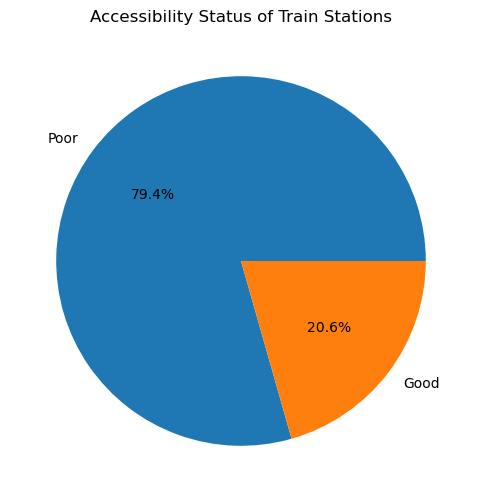

In [26]:
accessibility_df['accessibility_status'].value_counts().plot.pie(
    autopct='%1.1f%%',
    title='Accessibility Status of Train Stations',
    figsize=(6, 6)
)
plt.ylabel('')
plt.show()


### Visualization of Nearby Facilities per Train Station

This bar chart illustrates the number of nearby accessible public toilets and non-steep footpaths for each train station within a 1000-meter radius. The visualization uses:
- Blue bars to represent the count of nearby accessible toilets.
- Orange bars to represent the count of nearby non-steep footpaths.

The chart helps to:
- Highlight train stations with sufficient accessibility facilities.
-I dentify stations with inadequate facilities, guiding improvement efforts.
- Compare the distribution of toilets and footpaths across different train stations.

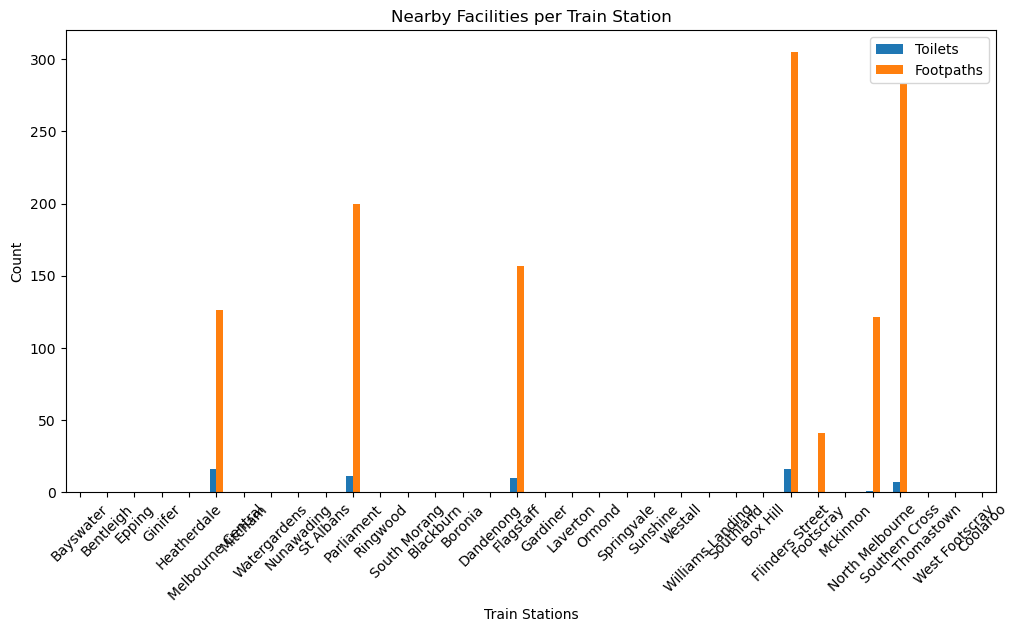

In [27]:
accessibility_df.plot(
    x='station',
    y=['nearby_toilets', 'nearby_footpaths'],
    kind='bar',
    figsize=(12, 6),
    title='Nearby Facilities per Train Station'
)
plt.ylabel('Count')
plt.xlabel('Train Stations')
plt.xticks(rotation=45)
plt.legend(['Toilets', 'Footpaths'])
plt.show()


### Visualizing Stations with Poor Accessibility

To identify and highlight stations with "Poor" accessibility, the accessibility_df DataFrame is filtered for entries labeled as "Poor" in the accessibility_status column. These stations lack adequate nearby accessible toilets or non-steep footpaths.

Using Folium, an interactive map centered on Melbourne is created. Markers representing these stations are added to the map, with red icons and popups displaying station details such as name, nearby toilet count, and footpaths. This visualization helps planners prioritize improvements efficiently

In [28]:
accessibility_df = pd.merge(accessibility_df, train_stations[['station', 'latitude', 'longitude']], on='station', how='left')

In [29]:
# Filter stations with poor accessibility
poor_accessibility_stations = accessibility_df[accessibility_df['accessibility_status'] == 'Poor']

# Create a map centered on Melbourne
melbourne_map = folium.Map(location=[-37.8136, 144.9631], zoom_start=12)

# Add markers for stations with poor accessibility
for _, station in poor_accessibility_stations.iterrows():
    folium.Marker(
        [station['latitude'], station['longitude']],
        popup=f"<b>Station:</b> {station['station']}<br><b>Nearby Toilets:</b> {station['nearby_toilets']}<br><b>Nearby Footpaths:</b> {station['nearby_footpaths']}",
        icon=folium.Icon(color='red', icon='info-sign')
    ).add_to(melbourne_map)

# Display the map
display(melbourne_map)


### Visualizing High-Risk Steepness on the Map

This visualization identifies footpaths with high-risk steepness based on a defined gradient percentage threshold.

- Filtering Footpaths Data: The dataset is filtered to include only footpaths with a gradient percentage greater than the specified threshold. These paths represent areas that may pose accessibility challenges.

- Adding Circle Markers: Using folium.CircleMarker, each high-risk footpath is represented as a red circle on the map, ensuring easy identification of steep locations.

- Customizing Marker Appearance: The markers are visually distinct, with a semi-transparent red fill, enabling users to clearly differentiate high-risk areas.

- Interactive Visualization: Clicking on a marker reveals details such as the gradient percentage and the exact coordinates of the location.

This map offers an essential tool for assessing accessibility and highlights areas requiring attention to improve safety and accessibility for individuals with mobility challenges.

In [30]:
# threshold for high-risk steepness
HIGH_RISK_THRESHOLD = 30

# Filter footpaths with high-risk steepness
high_risk_footpaths = footpaths[footpaths['gradient_percentage'] > HIGH_RISK_THRESHOLD]

# Create a map centered on Melbourne
high_risk_map = folium.Map(location=[-37.8136, 144.9631], zoom_start=12)

# Add high-risk steepness locations to the map
for _, path in high_risk_footpaths.iterrows():
    folium.CircleMarker(
        [path['latitude'], path['longitude']],
        radius=7,
        popup=f"<b>Location:</b> ({path['latitude']}, {path['longitude']})<br><b>Gradient:</b> {path['gradient_percentage']}%",
        color='red',
        fill=True,
        fill_color='red',
        fill_opacity=0.6
    ).add_to(high_risk_map)

# Display the map
display(high_risk_map)


### Mapping Future Recommendations for Public Toilets

This visualization focuses on identifying underserved areas for public toilets and marking zones for future recommendations.

- Underserved Stations Identification: Locations with zero nearby toilets are filtered from the dataset, highlighting areas needing public toilet facilities.

- Highlighting Underserved Stations: Orange markers are added to the map to pinpoint these underserved stations, providing a clear visual reference.

In [31]:
# identify underserved stations
underserved_stations = accessibility_df[accessibility_df['nearby_toilets'] == 0]

#Create a map centered on Melbourne
recommendations_map = folium.Map(location=[-37.8136, 144.9631], zoom_start=12)

# Add markers for underserved stations
for _, station in underserved_stations.iterrows():
    folium.Marker(
        [station['latitude'], station['longitude']],
        popup=f"<b>Station:</b> {station['station']}<br><b>Nearby Toilets:</b> {station['nearby_toilets']}<br><b>Nearby Footpaths:</b> {station['nearby_footpaths']}",
        icon=folium.Icon(color='orange', icon='warning-sign')
    ).add_to(recommendations_map)

#define future recommended zones
for _, station in underserved_stations.iterrows():
    # Define a rectangle around each station (adjusting latitude and longitude)
    sw_corner = [station['latitude'] - 0.005, station['longitude'] - 0.005]  # Southwest corner
    ne_corner = [station['latitude'] + 0.005, station['longitude'] + 0.005]  # Northeast corner
    
    folium.Rectangle(
        bounds=[sw_corner, ne_corner],
        popup=f"<b>Recommended Area:</b> Near {station['station']}",
        color='green',
        fill=True,
        fill_color='green',
        fill_opacity=0.3
    ).add_to(recommendations_map)

# Display the map
display(recommendations_map)


### Future Recommendations

Based on our analysis of the datasets, the following recommendations can be made to enhance accessibility across Melbourne:

- Expand Accessible Toilets: Our findings identified underserved areas with zero nearby toilets. These zones should be prioritized for the installation of wheelchair-accessible public toilets to address accessibility gaps.

- Address High-Risk Footpath Steepness: By analyzing footpath gradient data, we pinpointed areas with steep gradients. Future initiatives should focus on reducing the steepness of these footpaths to ensure safe and comfortable navigation for all users.

- Enhance Train Station Accessibility: Stations marked with poor accessibility were highlighted in the analysis. Upgrading these stations with features like lifts, ramps, and better signage can significantly improve access for individuals with mobility challenges.

- Leverage Data-Driven Insights: The accessibility status and proximity data generated during this project can serve as a foundation for ongoing monitoring and planning. Dynamic maps can continue to guide decision-makers in identifying high-priority areas for future improvements.

- Facilitate Community-Centric Planning: The availability of dynamic visualizations, such as maps showing accessible facilities, provides a platform for community feedback and involvement. This ensures that the proposed solutions align with real-world needs.

These recommendations, derived from data analysis, aim to create a more inclusive city by addressing the current gaps in accessibility and ensuring a safer, more navigable environment for all.

### Summary of Use Case Analysis

This use case focused on analyzing accessibility for individuals with specific needs, using datasets on train stations, public toilets, and footpath steepness in Melbourne. Through data preprocessing, visualization, and proximity analysis, we identified areas with insufficient facilities and high-risk steepness.

Key findings include:
- Available facilities, such as accessible train stations, public toilets, and safe footpaths, were marked on another map, enabling individuals and caregivers to refer to these locations and plan their routes confidently and efficiently.
- Stations with "Poor" accessibility were highlighted on a map for targeted improvement.
- Locations with high-gradient footpaths were visualized to ensure safer routes.
- Underserved areas with no nearby toilets were marked, along with recommendations for future facility placement.

These dynamic maps provide actionable insights for stakeholders to address gaps in accessibility, enhance infrastructure, and ensure safe, barrier-free journeys for all members of the community.

### References

1.Vic.gov.au. (2024). Footpath steepness. [online] Available at: https://data.melbourne.vic.gov.au/explore/dataset/footpath-steepness/information/ [Accessed 24 Nov. 2024].<br>

2.Vic.gov.au. (2024). Metro train stations with accessibility information. [online] Available at: https://data.melbourne.vic.gov.au/explore/dataset/metro-train-stations-with-accessibility-information/information/ [Accessed 24 Nov. 2024].<br>

.3Vic.gov.au. (2024). Public toilets. [online] Available at: https://data.melbourne.vic.gov.au/explore/dataset/public-toilets/information/ [Accessed 24 Nov. 2024].<br>